<a href="https://colab.research.google.com/github/wmazza-br/wmazza-br/blob/main/Job_11_ML_Decision_Tree_Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='blue' style='font-size: 30px;'>Predição de Ataque Cardíaco</font>

As doenças cardiovasculares continuam a ser a principal causa de morte global. 

A detecção precoce dos sintomas é importante para evitar o desenvolvimento completo da doença e reduzir a mortalidade prematura. 

Os ataques cardíacos clássicos são caracterizados por fortes dores e pressão no peito, dor no braço, pescoço ou mandíbula. 

Contudo, quase metade dos ataques cardíacos são descritos como "silenciosos": eles não apresentam os sintomas mais típicos ou apresentam sintomas que você não reconhece como um sinal de doença cardíaca. 

Os ataques cardíacos silenciosos são mais comuns entre as mulheres e descritos por sintomas como falta de ar, fadiga e náuseas.

##<font color='blue' style='font-size: 30px;'>Metodologia utilizada</font>

A inteligência artificial vem revolucionando diversas áreas do conhecimento, dentre elas, a medicina.

Os modelos de Machine Learning (aprendizado de máquina) são ferramentas poderosas, que aliam matemática, computação avançada e estatística complexa, e que podem predizer comportamentos e situaçãoes futuras com alto grau de confiabilidade.

Nessa aplicação em específico, utilizarei um dos mais conhecidos e potentes modelos chamado de **Árvore de Decisão** que, de modo didático, auxilia o profissional a entender como a inteligência artificial atua, e como o modelo ajuda na predição do evento escolhido.

Como qualquer projeto de Machine Learning, há um famoso passo a passo padrão a ser desenvolvido, que visa a tornar didática a construção do modelo preditor.

Para esse projeto, seguirei as seguintes etapas de atuação:


1.   Entendimento do problema
2.   Obtenção dos dados e referência técnica
3.   Análise exploratória e visualização dos dados
4.   Pré-processamento
5.   Modelo de Machine Learning: Decision Tree
6.   Avaliação do modelo
7.   Conclusão

<hr style='border: 4px solid blue'>

###<font color='blue' style='font-size: 30px;'>1. Entendimento do problema</font>

Este é um conjunto de dados sobre pacientes, e alguns resultados de exames, que ao final revelam se tiveram infarto ou não.

Baseado nesse histórico, rodarei um modelo de aprendizado de máquina, que fornece critérios que apontam ou não para um futuro evento de infarto, dado qualquer futuro paciente.

Sobre o DataSet, existem 13 atributos: 

1. **age**: Idade (em anos) 

2. **sex**: sexo (1 = masculino; 0 = feminino) 

3. **cp**: Tipo de dor torácica:


> Valor 0: assintomático

> Valor 1: angina atípica

> Valor 2: dor não anginosa

> Valor 3: angina típica

 

 
4. **trestbps**: pressão arterial em repouso (em mmHg, na admissão no hospital) 

5. **chol**: colesterol sérico (em mg/dL)

6. **fbs**: glicemia em jejum (< 120 mg/dl = 0, > 120 mg/dl = 1)

7. **restecg**: resultados do eletrocardiograma em repouso:



> Valor 0: normal


> Valor 1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão de ST > 0,05 mV)


> Valor 2: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes
 
 

8. **thalach**: Maior número de batimentos por minuto que seu coração pode alcançar durante exercícios extenuantes

9. **exang**: angina induzida pelo exercício (1 = sim; 0 = não) 

10. **oldpeak**: infradesnivelamento do segmento ST induzido pelo exercício em relação ao repouso (em mm, obtido pela subtração dos pontos mais baixos do segmento ST durante o exercício e repouso)

11. **slope**: inclinação do pico do exercício Segmento ST, anormalidades ST-T são consideradas um indicador crucial para identificar a presença de isquemia


> Valor 0: descendente


> Valor 1: ascendente


> Valor 2: plano   

12. **ca**: número de vasos principais (0-3) colorido por fluoroscopia. Os principais vasos cardíacos são: aorta, veia cava superior, veia cava inferior, artéria pulmonar (sangue pobre em oxigênio --> pulmões), veias pulmonares (sangue rico em oxigênio --> coração) e artérias coronárias (fornece sangue para tecido cardíaco).

13. **thal (talassemia)**: 


> Valor 0: NULO


> Valor 1: defeito fixo (sem fluxo sanguíneo em alguma parte do coração)


> Valor 2: fluxo sanguíneo normal



> Valor 3: defeito reversível (observa-se um fluxo sanguíneo, mas não é normal)


 

14. **target**: ataque cardíaco (0 = não, 1 = sim)


<hr style='border: 4px solid blue'>

###<font color='blue' style='font-size: 30px;'>2.   Obtenção dos dados e referência técnica</font>

*   Fonte do dataset: KAGGLE, "*Heart Attack*"

*   Disponível em: https://www.kaggle.com/datasets/pritsheta/heart-attack

####<font>importando bibliotecas básicas em Python</font>

In [ ]:
#Bibliotecas básicas

import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Abrir base de dados, que está no Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio próprio/Heart Attack Data Set.csv')

<hr style='border: 4px solid blue'>

###<font color='blue' style='font-size: 30px;'>3.   Análise exploratória e visualização dos dados</font>

In [ ]:
#Primeira observação da base de dados, em Inglês

df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Renomeando as colunas para o Português

a_renomear = {
    'age' : 'Idade',
    'sex' : 'Genero',
    'cp' : 'Dor_Peito',
    'trestbps' : 'Press_Art',
    'chol' : 'Colest',
    'fbs' : 'Glicemia',
    'restecg' : 'Eletrocardio',
    'thalach' : 'Freq_Card',
    'exang' : 'Angina_Induz_Exerc',
    'oldpeak' : 'Depres_ST',
    'slope' : 'Inclin_Segm_ST',
    'ca' : 'Num_Vasos',
    'thal' : 'Talassemia',
    'target' : 'Infarto'
}
df = df.rename(columns = a_renomear)
df

,Idade,Genero,Dor_Peito,Press_Art,Colest,Glicemia,Eletrocardio,Freq_Card,Angina_Induz_Exerc,Depres_ST,Inclin_Segm_ST,Num_Vasos,Talassemia,Infarto
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#Checando os dados únicos de cada variável

df.nunique()

Idade                  41
Genero                  2
Dor_Peito               4
Press_Art              49
Colest                152
Glicemia                2
Eletrocardio            3
Freq_Card              91
Angina_Induz_Exerc      2
Depres_ST              40
Inclin_Segm_ST          3
Num_Vasos               5
Talassemia              4
Infarto                 2
dtype: int64

In [ ]:
#Checando se há dados nulos, que podem atrapalhar os cálculos do modelo à frente

df.isnull().sum()

Idade                 0
Genero                0
Dor_Peito             0
Press_Art             0
Colest                0
Glicemia              0
Eletrocardio          0
Freq_Card             0
Angina_Induz_Exerc    0
Depres_ST             0
Inclin_Segm_ST        0
Num_Vasos             0
Talassemia            0
Infarto               0
dtype: int64

In [ ]:
#Conhecendo as variáveis e seus tipos de dados: numéricas ou categóricas?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Idade               303 non-null    int64  
 1   Genero              303 non-null    int64  
 2   Dor_Peito           303 non-null    int64  
 3   Press_Art           303 non-null    int64  
 4   Colest              303 non-null    int64  
 5   Glicemia            303 non-null    int64  
 6   Eletrocardio        303 non-null    int64  
 7   Freq_Card           303 non-null    int64  
 8   Angina_Induz_Exerc  303 non-null    int64  
 9   Depres_ST           303 non-null    float64
 10  Inclin_Segm_ST      303 non-null    int64  
 11  Num_Vasos           303 non-null    int64  
 12  Talassemia          303 non-null    int64  
 13  Infarto             303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Análise exploratória dos dados numéricos

df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Idade,303.0,54.0,9.0,29.0,48.0,55.0,61.0,77.0
Genero,303.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Dor_Peito,303.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0
Press_Art,303.0,132.0,18.0,94.0,120.0,130.0,140.0,200.0
Colest,303.0,246.0,52.0,126.0,211.0,240.0,274.0,564.0
Glicemia,303.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Eletrocardio,303.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
Freq_Card,303.0,150.0,23.0,71.0,134.0,153.0,166.0,202.0
Angina_Induz_Exerc,303.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Depres_ST,303.0,1.0,1.0,0.0,0.0,1.0,2.0,6.0


Percebe-se a aparição de alguns outliers em **Press_Art**, **Depres_ST** e **Colest**, por exemplo, que podem distorcer futuras previsões. É bom ficar atento a esse fato.
<hr>

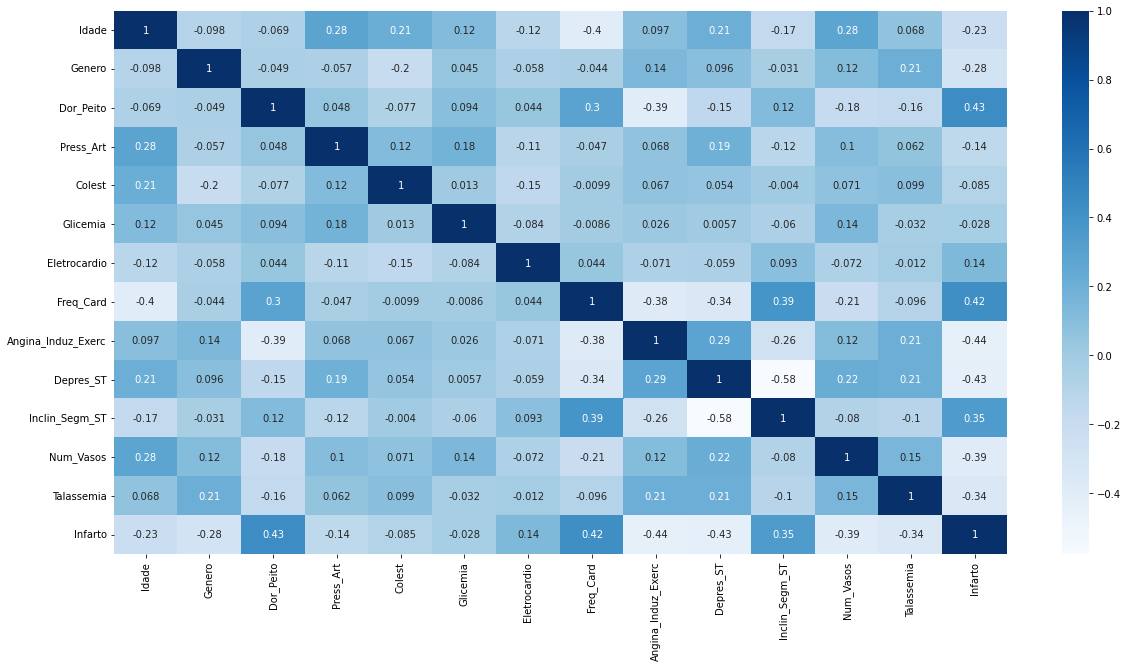

In [ ]:
#Cálculo de correlação entre variáveis numéricas

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot = True, cmap='Blues')

As correlações que me interessam, de fato, são aquelas referentes à variável **Infarto**.

Em princípio, não há nenhuma variável com forte correlação, por outro lado, há um equilíbrio de valores entre outras 6 variáveis, positiva e negativamente, a saber: "**Dor_Peito**", "**Freq_Card**", "**Angina_Induz_Exerc**", "**Depres_ST**", "**Inclin_Segm_ST**", e **"Num_Vasos"**.

Vou separá-las e isolá-las, a fim de compreender como se relacionam com a variável dependente.

<hr>

In [ ]:
#Separando as principais correlações com 'Infarto'

principais_correlacoes=["Dor_Peito","Freq_Card","Angina_Induz_Exerc","Depres_ST","Inclin_Segm_ST","Num_Vasos"]

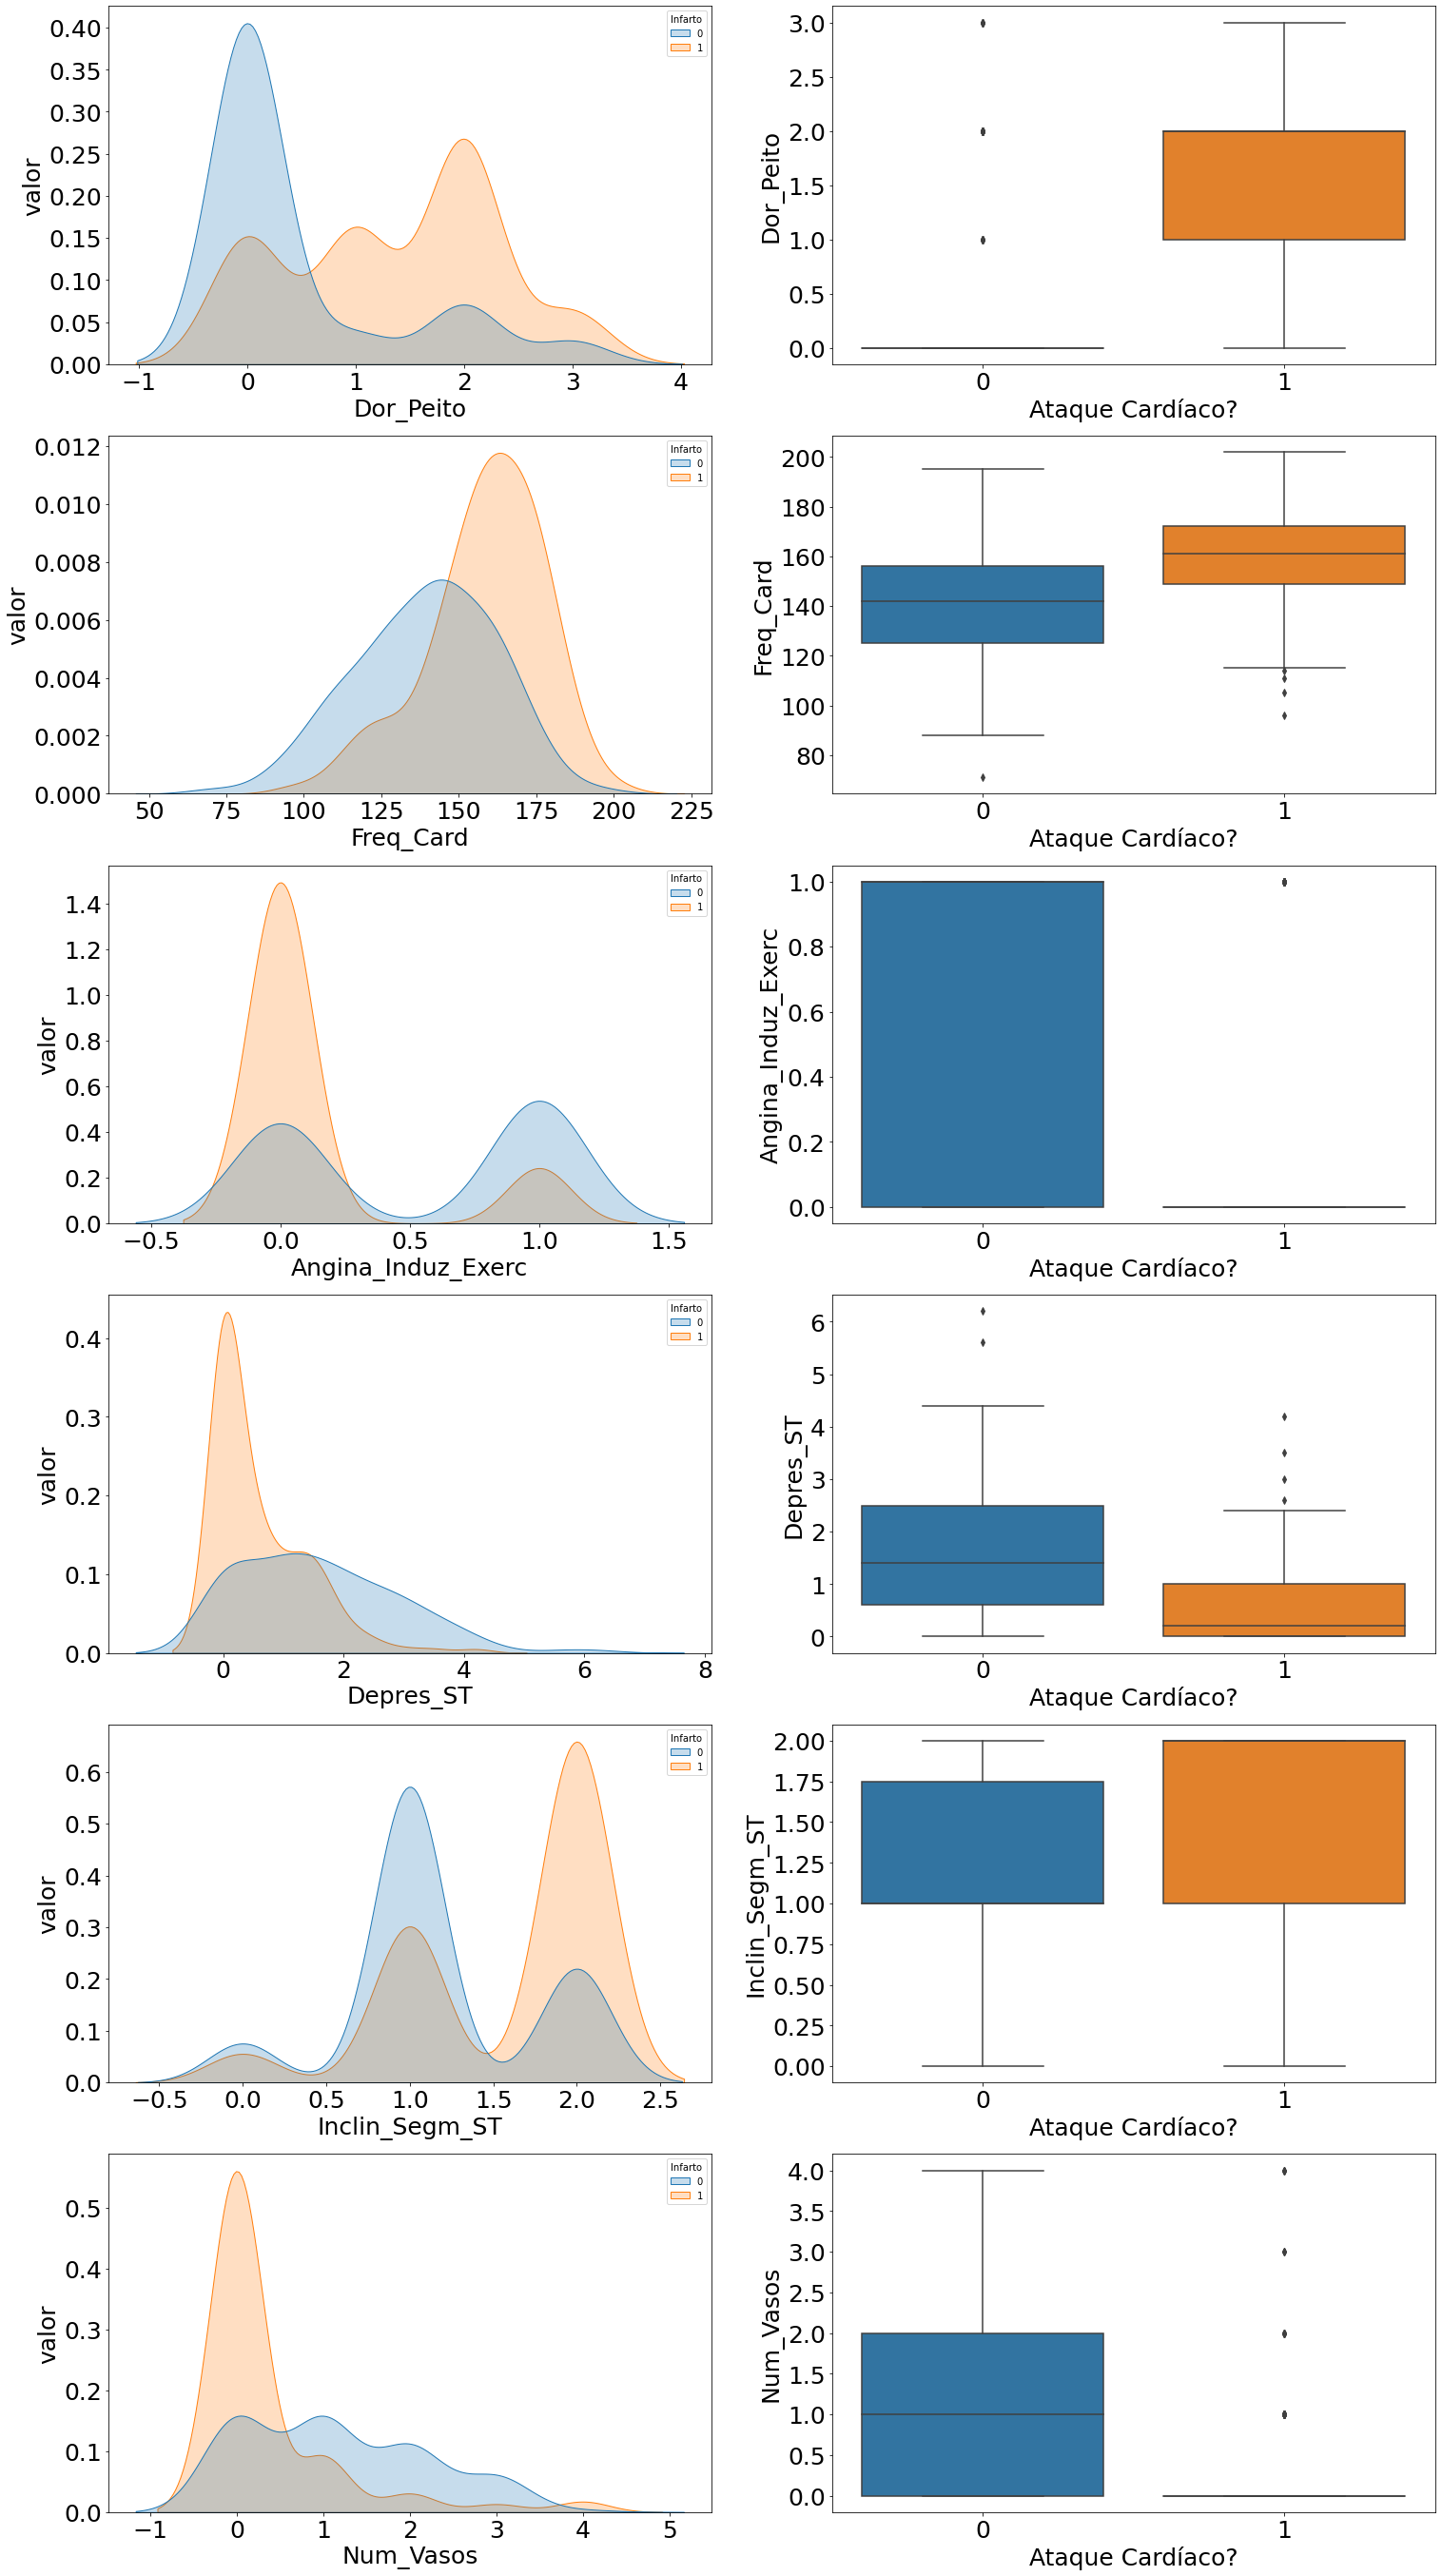

In [ ]:
#Preparação para os gráficos

i=1
plt.figure(figsize=(25,90))
for col in principais_correlacoes:
    plt.subplot(11,2,i)
    sns.kdeplot(data=df,hue="Infarto",x=col,shade = "fill")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("valor",fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    sns.boxplot(df["Infarto"],df[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel("Ataque Cardíaco?",fontsize=25)
    plt.ylabel(col,fontsize=25)
    i=i+1

plt.show()

É momento de avaliar graficamente as variáveis mais importantes e correlacionadas com mais vigor à variável **Infarto**:

Claro, como não sou médico, estarei atento apenas ao que os números dizem.


*   **Dor_Peito**: mostra claramente como os assintomáticos são aqueles que majoritariamente não sofrem infarto. Também mostra que os que têm "dor não anginosa" são os que mais sofrem infarto.
*   **Freq_Card**: os que sofrem infarto também são aqueles que atingem em torno de 170 bpm, ao contrário dos 145 de quem não sofre.
*   **Angina_Induz_Exerc**: quem não tem a angina também é a esmagadora maioria dos casos de quem sofre infarto.
*   **Depres_ST**: valores baixos que indicam isquemia também são fortes reveladores dos casos pró-infarto.
*   **Inclin_Segm_ST**: os que tem a inclinação do pico do exercício Segmento ST com valor plano também são a maioria dos que sofrem infarto. Os que não sofrem infarto têm valor ascendente.
*   **Num_Vasos**: por fim, os que não apresentam vasos coloridos pela fluoroscopia são candidatos quase certos - em conjunto com os demais fatores - ao infarto, infelizmente.


<hr>

###<font color='blue' style='font-size: 30px;'>4.   Pré-Processamento dos dados</font>

In [ ]:
from sklearn.model_selection import train_test_split

#Dividindo o conjunto de dados em treino e teste

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
train_set_size = len(train_set)
test_set_size = len(test_set)

print('Tamanho do conjunto de treino:', train_set_size)
print('Tamanho do conjunto de test:', test_set_size)

Tamanho do conjunto de treino: 242
Tamanho do conjunto de test: 61


In [ ]:
!pip install sweetviz
import sweetviz as sv

#Criando uma cópia dos dados de treino

df_eda = train_set.copy()


#Importando análise visual e exploratória para um arquivo html

my_report = sv.analyze(df_eda)
my_report.show_html()

     |████████████████████████████████| 15.1 MB 9.1 MB/s 


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#Criando uma cópia do conjunto de dados

df_clean = df_eda.copy()


#Separando as variáveis dependentes das independentes

X_train = df_clean.drop('Infarto', axis = 1)
y_train = df_clean[['Infarto']]

In [ ]:
!pip install boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

#Selecionando variáveis com o 'boruta'

forest = RandomForestRegressor(n_jobs = -1,max_depth = 5)
boruta = BorutaPy(estimator = forest, n_estimators = 'auto', max_iter = 100) # número de tentativas


#Treinando o boruta

boruta.fit(np.array(X_train), y_train)


#Resultados

green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()

print('Variáveis fortes:', green_area)
print('Variáveis fracas:', blue_area)

     |████████████████████████████████| 56 kB 2.4 MB/s 
Variáveis fortes: ['Dor_Peito', 'Angina_Induz_Exerc', 'Depres_ST', 'Num_Vasos', 'Talassemia']
Variáveis fracas: ['Idade', 'Freq_Card']


Interessante notar dentro das variáveis tida como 'fortes', surgiu a **Talassemia**, que não apresentou correlação interessante com a variável do **Infarto**.

Além disso, a variável **Freq_Card**, que foi isolada em face a sua correlação com **Infarto**, foi selecionada pelo algoritmo como 'fraca'.

Isso pode mesmo ocorrer, na medida em que sabemos que correlação não gera necessariamente causalidade. Dessa forma, correlação não pode ser vista isoladamente, mas como parte do conjunto da análise, sem sub nem supervalorização!
<hr>

In [ ]:
#Atualizando a matriz de variáveis independentes que irá alimentar o modelo

X_filtered = boruta.transform(np.array(X_train))

####<font color='blue' style='font-size: 30px;'>Modelo 1 (sem seleção de variáveis)</font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


#Criando uma cópia dos dados

X_cv = X_train.copy()
y_cv = y_train.copy()


#Intanciando e aplicando a validação cruzada

tree = DecisionTreeClassifier(random_state = 42)
tree_scores = cross_val_score(tree, X_cv, y_cv, scoring = 'f1_macro', cv = 5)
tree_f1score = tree_scores


#Função de avaliação dos resultados

def display_scores(scores):
  print('Scores:', scores)
  print('Média:', scores.mean())
  print('Desvio Padrão:', scores.std())


#Avaliação do baseline

display_scores(tree_f1score)

Scores: [0.7541806  0.72742833 0.80210719 0.68627451 0.72810458]
Média: 0.7396190411653116
Desvio Padrão: 0.03806216890431208


####<font color='blue' style='font-size: 30px;'>Modelo 2 (com seleção de variáveis)</font>

In [ ]:
#Criando uma cópia dos dados

X_cv_filtered = X_filtered.copy()
y_cv_filtered = y_train.copy()


#Intanciando e aplicar a validação cruzada

tree2 = DecisionTreeClassifier(random_state = 42)
tree2_scores = cross_val_score(tree2, X_cv_filtered, y_cv_filtered,
scoring = 'f1_macro', cv = 5)
tree2_f1score = tree2_scores


#Avaliação do baseline

display_scores(tree2_f1score)

Scores: [0.69336671 0.64356012 0.71929825 0.74603175 0.77073383]
Média: 0.7145981290576119
Desvio Padrão: 0.04395122697263718


###<font color='blue' style='font-size: 30px;'>5.   Modelo de Machine Learning: Decision Tree</font>

In [ ]:
#Criando uma cópia do conjunto de testes
df_test = test_set.copy()


#Separando as variáveis dependentes das independentes
X_test = df_test.drop('Infarto', axis = 1)
y_test = df_test[['Infarto']]


#Aplicando o pipeline de preparação de dados no conjunto de teste
X_test_final = boruta.transform(np.array(X_test))


#Definindo o modelo final

final_model = DecisionTreeClassifier(random_state = 42)
final_model.fit(X_cv_filtered, y_cv_filtered)


#Fazendo previsões em cima de novos dados

y_pred = final_model.predict(X_test_final)


#Imprimindo relatório de classificação

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Acurácia geral:",accuracy_score(y_test, y_pred))
print("Precisão geral:",precision_score(y_test, y_pred, average='macro'))
print("Recall geral:",recall_score(y_test, y_pred, average='macro'))

Acurácia geral: 0.7540983606557377
Precisão geral: 0.7672222222222222
Recall geral: 0.7591594827586207


Os resultados de acurácia do **modelo**, **precisão** e **recall**, mostram muita estabilidade e qualidade da árvore de decisão a ser construída e mostrada por este modelo.

É sempre importante lembrar que se trata de um modelo, não de um oráculo. Nenhum modelo é 100% perfeito, e ao ser utilizado, precisa ficar claro que há margem de erros e acertos e que isso é normal e faz parte dos processo de aprendizado de máquina.
<hr>

###<font color='blue' style='font-size: 30px;'>6. Avaliação do Modelo</font>

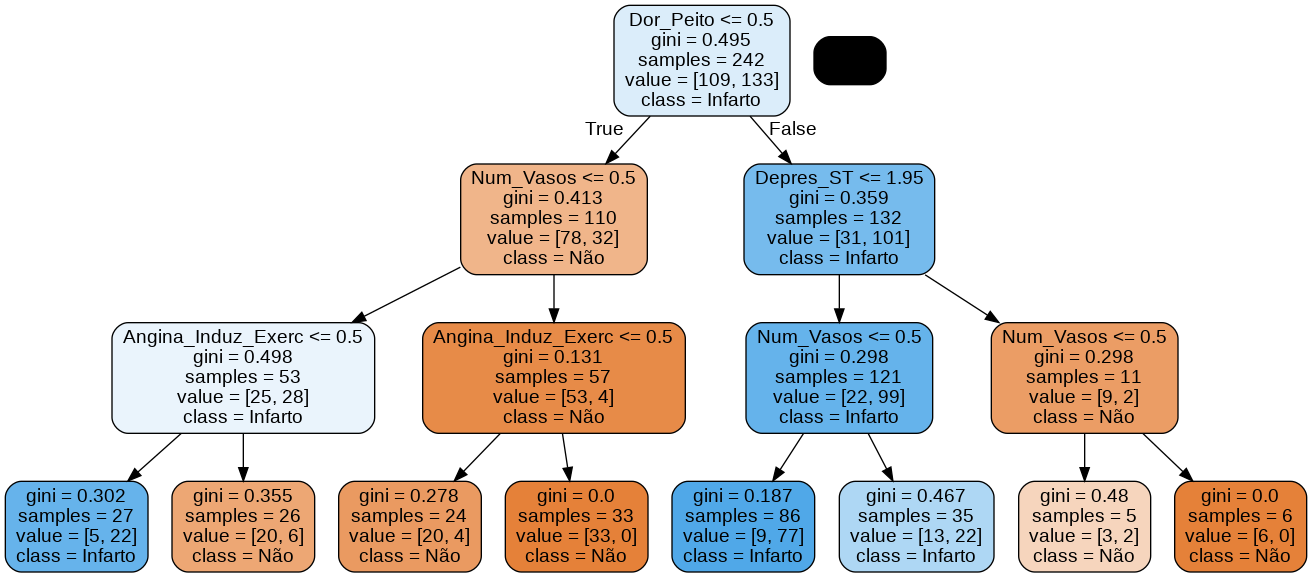

In [ ]:
#Visualizando graficamente a árvore treinada

from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os

#Criando um modelo simples

viz_model = DecisionTreeClassifier(max_depth=3)
viz_model.fit(X_cv_filtered, y_cv_filtered)


#Criando DOT

dot = export_graphviz(viz_model, filled=True, rounded=True,
feature_names=X_train.columns[boruta.support_].to_list(),
class_names=['Não', 'Infarto'])


#Plotando o gráfico

graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

Interpretação da Árvore de Decisão.

Vou seguir, por exemplo, o caminho da predição de **Infarto** (retângulos azul escuro):



*   **Tem dor no peito (valor <= 0.5)**?


> **Sim (True)**: 110 estão nessa situação (78 sem infarto, 32 com infarto)


> **Não (False)**:  132 não estão nessa situação (31 sem infarto, 101 com infarto)




*   No caso de Não (False): **O indicador 'Depres_ST' <= 1.95?**


> **Sim (True)**: 121 estão nessa situação (22 sem infarto, 99 com infarto)


> **Não (False)**:  11 não estão nessa situação (31 sem infarto, 101 com infarto)

*   No caso de Sim (True): **O indicador 'Num_Vasos' <= 0.5?**


> **Sim (True)**: 86 estão nessa situação (9 sem infarto, 77 com infarto)


> **Não (False)**:  35 não estão nessa situação (13 sem infarto, 22 com infarto)

Esse foi o caminho mais provável do infarto!
<hr>

###<font color='blue' style='font-size: 30px;'>7. Conclusão</font>

É de ficar realmente impressionado com o poder e qualidade do modelo de Machine Learning Decision Tree Classifier (Árvore de Decisão)!

Sua estrutura torna fácil a compreensão da lógica utilizada pela inteligência artificial, tornando acessível o entendimento de se haverá infarto ou não do paciente, com alguma margem de erro, claro.

A base de dados é real, e a acuracidade do modelo também, podendo ser utilizado de imediato e como está para auxiliar na predição dessa ocorrência médica tão grave, que é o infarto.

<hr>